# Markdown Cell Example 
markdown can be readibly interleaved and dispersed between code in notebooks 
## Explanation of code below
The histogram (x-axis) binned readability score, (y-axis) counts of papers that occupy that readability score. 

The histogram is initially populated exclusively by the ART corpus, but the idea was every time a new author got scraped from scholar, it would be added in, such that with each persons new search our big picture of science readability would be better informed.

So the histogram changes a little modestly perceptible amount with the author scrape, but three dots pertaining to the authors easiest read, hardest read, and mean read where added.

These used to be ```[mean-standard dev, mean, mean+standard dev]``` but there was a flaw implementing that. It could just be that the plot looked way too busy around the mean, and it was harder to look at.

There is an issue with getting the dots to appear in the centre of histogram bins. I was working under the assumption, that if I knew the ```[min,mean,max]```, readability scores for Rick Gerkin, I could add to them half the bin width, and dot's would be centred. That is almost correct. I forgot that these calculations are not performed on pre binned data, so the x-coordinates of ```[min,mean,max]``` need to be slightly shifted to the nearest histogram bin start first.

Think of it as a bit like snapping something to a grid in photoshop.

It should be easy to hack this code to run off a local machine, using sudo.
Set up the Environment. This is now done in requirements, and the postBuild script.
```python
!pip install matplotlib
!pip install pandas
!pip install seaborn

if os.path.exists('traingDats.p?dl=0'):
    pass

else:
    !wget https://www.dropbox.com/s/3h12l5y2pn49c80/traingDats.p?dl=0
    !wget https://www.dropbox.com/s/crarli3772rf3lj/more_authors_results.p?dl=0
    !wget https://www.dropbox.com/s/x66zf52himmp5ox/benchmarks.p?dl=0
```

In [1]:
import pickle
import copy
import matplotlib as mpl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly as py


In [2]:

with open('traingDats.p?dl=0','rb') as f:
        trainingDats = pickle.load(f) 
print(trainingDats)

bmark = pickle.load(open('benchmarks.p?dl=0','rb'))
NAME,ar = pickle.load(open('more_authors_results.p?dl=0','rb'))
trainingDats.extend(bmark)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [3]:

def get_heights(stats_items,histogram_content,x_sub_set):
    vertical_postions_indexs = []
    for i in stats_items:
        vertical_postions_indexs.append(find_nearest(histogram_content, i))
    bin_width_offset = (xys[1][0] - xys[0][0])/2.0
    x_sub_set = [ i+bin_width_offset for i in x_sub_set ]


    heights = []
    for i in vertical_postions_indexs:
        heights.append(xys[i][1])
    return heights, bin_width_offset


def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

def snap_to_grid(author_stats,bin_centers):
    author_stats_grid = []
    for as_ in author_stats:
        as_ = find_nearest(bin_centers,as_)
        author_stats_grid.append(bin_centers[as_])
    return author_stats_grid


'\nbmark_stats_items_grid = snap_to_grid(bmark_stats_items,bin_centers)\nauthor_stats =[i for i in [mean_,min_,max_]]\nauthor_stats_grid = snap_to_grid(author_stats,bin_centers)\nmean_a_grid = snap_to_grid([mean_a],bin_centers)\nx_sub_set_grid = snap_to_grid(x_sub_set,bin_centers)\n'

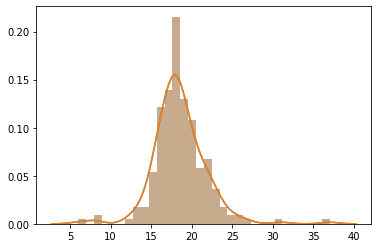

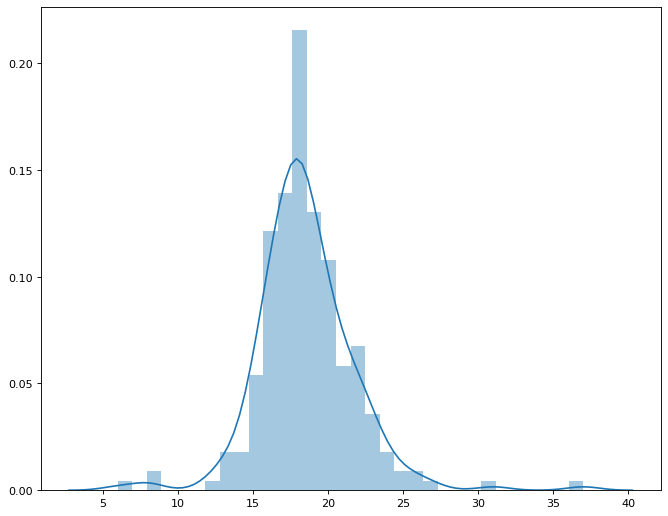

In [4]:


standard_sci = [ t['standard'] for t in trainingDats ]
ar = [ t for t in ar if type(t) is type({})]
ar = [ t for t in ar if 'standard' in t.keys()]
#print(ar)
xys = [ (h.get_x(),h.get_height()) for h in sns.distplot(standard_sci).patches ]

x_grid = [ h.get_x() for h in sns.distplot(standard_sci).patches ]
offset = float((x_grid[1] - x_grid[0])/2.0)
bin_centers = [gr+offset for gr in x_grid]
#print(bin_centers)
# this plot not used yet.

fig = plt.figure(figsize=(10, 8), dpi=80)
ax1 = fig.add_subplot(111)#)
#print(ar)
mean_ = np.mean([a['standard'] for a in ar])
min_ = np.min([a['standard'] for a in ar])
max_ = np.max([a['standard'] for a in ar])
std_ = np.std([a['standard'] for a in ar])
stats_items = [mean_,min_,max_]

g = sns.distplot(standard_sci, label="Readability Index")


histogram_content = [x[0] for x in xys]
height_content = np.array([x[1] for x in xys])

hc = np.array(histogram_content)

# code for plotting std deviation.
sub_set = np.where((histogram_content>=mean_-std_) & (histogram_content<=mean_+std_))
x_sub_set = np.array(histogram_content)[sub_set]

std_plot_ind = height_content[sub_set]
sub_set = sub_set[0].tolist()

assert len(sub_set) < len(histogram_content)


bmark_stats_items = [ b['standard'] for b in bmark ]
categories = [ "upgoer 5", "Readibility Declining Over Time","Science of Writing","Post Modern Essay Generator"]
bmark_heights, bwo = get_heights(bmark_stats_items,histogram_content,x_sub_set)
heights, bwo = get_heights(stats_items,histogram_content,x_sub_set)
bmark_stats_items = [i+bwo for i in bmark_stats_items]
mean_a = mean_
min_a = min_ 
max_a = max_ 
'''
bmark_stats_items_grid = snap_to_grid(bmark_stats_items,bin_centers)
author_stats =[i for i in [mean_,min_,max_]]
author_stats_grid = snap_to_grid(author_stats,bin_centers)
mean_a_grid = snap_to_grid([mean_a],bin_centers)
x_sub_set_grid = snap_to_grid(x_sub_set,bin_centers)
'''

In [5]:

bmark_stats_items_grid = snap_to_grid(bmark_stats_items,bin_centers)
author_stats =[i for i in [mean_,min_,max_]]
author_stats_grid = snap_to_grid(author_stats,bin_centers)
mean_a_grid = snap_to_grid([mean_a],bin_centers)
x_sub_set_grid = snap_to_grid(x_sub_set,bin_centers)
print(mean_a_grid)
print(x_sub_set_grid)
print(author_stats_grid)
print(bmark_stats_items_grid)

[18.109375]
[15.203125, 16.171875, 17.140625, 18.109375, 19.078125, 20.046875, 21.015625]
[18.109375, 13.265625, 25.859375]
[6.484375, 8.421875, 14.234375, 16.171875, 8.421875]


In [6]:
# data1

In [7]:

np.max(height_content)
heights

[0.13015427769985974, 0.017952314165497897, 0.004488078541374474]

In [8]:

heights[0] = np.max(height_content)

[18.109375] mga
6.484375 0.004488078541374474 upgoer 5
8.421875 0.008976157082748949 Readibility Declining Over Time
14.234375 0.017952314165497897 Science of Writing
16.171875 0.1211781206171108 Post Modern Essay Generator
18.109375 0.21542776998597474 ['Rick Gerkin'] mean
0.21542776998597474
13.265625 0.017952314165497897 ['Rick Gerkin'] min
0.017952314165497897
25.859375 0.004488078541374474 ['Rick Gerkin'] max
0.004488078541374474
<a list of 10 Text xticklabel objects>


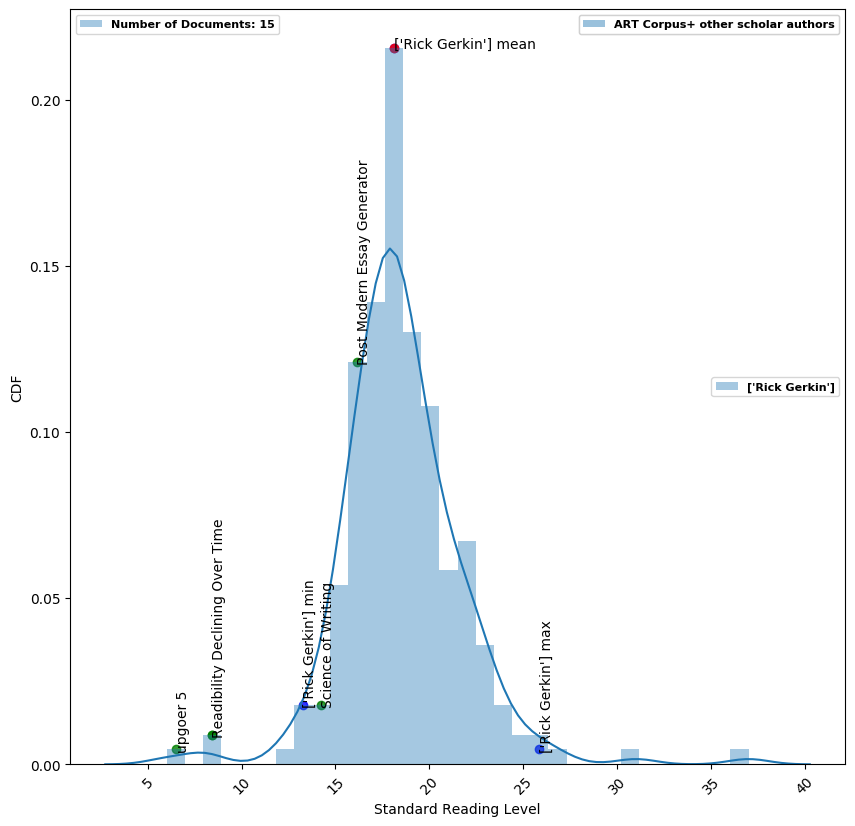

In [9]:
fig = plt.figure(figsize=(10, 10), dpi=100)
ax1 = fig.add_subplot(111)#)
g = sns.distplot(standard_sci, label="Readability Index")

benchmarks = pd.DataFrame({
'benchmarks': bmark_stats_items_grid,
    'CDF': bmark_heights
    })


data0 = pd.DataFrame({
'mean, min, maximum': author_stats_grid,
    'CDF': heights
    })


print(mean_a_grid,'mga')
data2 = pd.DataFrame({
'Standard Reading Level': mean_a_grid,
    'CDF': np.max(height_content)
    })



data1 = pd.DataFrame({
'Standard Reading Level': x_sub_set_grid,
    'CDF': std_plot_ind
    })

legend_properties = {'weight':'bold','size':8}

ax = sns.regplot(data=benchmarks, x="benchmarks", y="CDF", fit_reg=False, marker="o", color="green")


cnt=0
for i,j,k in zip(bmark_stats_items_grid[0:-1],bmark_heights[0:-1],categories):
    print(i,j,k)
    if cnt==1:
        #j=j+0.02
        ax.text(i,j,k, rotation=90)

    else:
        ax.text(i,j,k, rotation=90)
    cnt +=1
cnt = 0
for i,j,k in zip(author_stats_grid,heights,[str(NAME)+' mean',str(NAME)+' min',str(NAME)+' max']):
    print(i,j,k)

    print(j)
    if cnt==0:
        ax.text(i,j,k, rotation=0)
    else:
        ax.text(i,j,k, rotation=90)

    cnt +=1

ax = sns.regplot(data=data0, x="mean, min, maximum", y="CDF", fit_reg=False, marker="o", color="blue")
#ax = sns.regplot(x='Standard Reading Level', y='CDF',data=data1, fit_reg=False, marker="o", color="green")#, data=fmri)
ax = sns.regplot(data=data2, x="Standard Reading Level", y="CDF", fit_reg=False, marker="o", color="red")

legendMain=ax.legend(labels=[str("std deviation")], prop=legend_properties,loc='upper right')

legendSide0=ax.legend(labels=[NAME],prop=legend_properties,loc='center right')
legendSide1=ax.legend(labels=[str('Number of Documents: '+str(len(ar)))],prop=legend_properties,loc='upper left')
#print(len(ar))


legendMain=ax.legend(labels=[str("ART Corpus+ other scholar authors")], prop=legend_properties,loc='upper right')
ax.add_artist(legendMain)
ax.add_artist(legendSide0)
ax.add_artist(legendSide1)
print(ax.get_xticklabels())
rotation = 90

locs, labels = plt.xticks()
plt.setp(labels, rotation=45)

plt.savefig(str(NAME)+'_author_readability.png')
plt.show()


In [10]:
data2


,Standard Reading Level,CDF
0,18.109375,0.215428


In [11]:
data1

,Standard Reading Level,CDF
0,15.203125,0.121178
1,16.171875,0.139130
2,17.140625,0.215428
3,18.109375,0.130154
4,19.078125,0.107714
5,20.046875,0.058345
6,21.015625,0.067321


In [12]:
data0

,"mean, min, maximum",CDF
0,18.109375,0.215428
1,13.265625,0.017952
2,25.859375,0.004488


In [13]:
bmark_stats_items

[6.484375, 8.484375, 14.484375, 16.484375, 8.484375]

In [14]:
bmark

[{'link': 'http://splasho.com/upgoer5/library.php',
  'page_rank': 'benchmark',
  'wcount': 67300,
  'english': True,
  'science': False,
  'uniqueness': 0.028601759175007582,
  'info_density': 0.02437703464324186,
  'scaled_info_density': -3.6221448206897264e-07,
  'sp': 0.06790958242825419,
  'ss': 0.49938406998918644,
  'gf': 10.269783596852868,
  'standard': 6.0,
  'penalty': 6.56729365241744},
 {'link': 'https://elifesciences.org/download/aHR0cHM6Ly9jZG4uZWxpZmVzY2llbmNlcy5vcmcvYXJ0aWNsZXMvMjc3MjUvZWxpZmUtMjc3MjUtdjIucGRm/elife-27725-v2.pdf?_hash=WA%2Fey48HnQ4FpVd6bc0xCTZPXjE5ralhFP2TaMBMp1c%3D',
  'page_rank': 'benchmark',
  'wcount': 56830,
  'english': True,
  'science': False,
  'uniqueness': 0.030918375488709807,
  'info_density': 6.526793848496797e-05,
  'scaled_info_density': -1.1484768341539324e-09,
  'sp': 0.04314017955090245,
  'ss': 0.43614448710505843,
  'gf': 9.273707418451252,
  'standard': 8.0,
  'penalty': 8.479284666655962},
 {'link': 'https://cseweb.ucsd.edu/~swa

In [15]:
trainingDats[-1]

{'link': 'local_resource',
 'wcount': 299,
 'english': True,
 'science': False,
 'uniqueness': 0.5913978494623656,
 'info_density': 0.012151898734177215,
 'scaled_info_density': -4.064180178654587e-05,
 'sp': 0.1776315789473684,
 'ss': 0.5230263157894737,
 'gf': 18.021016949152543,
 'standard': 8.0,
 'penalty': 8.700657894736842}